In [1]:
%pylab inline
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn import cross_validation
import pandas as pd
store = pd.HDFStore('store.h5')
importance=store['feature_score_rf']

Populating the interactive namespace from numpy and matplotlib


Using Theano backend.


In [2]:

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def Show(N=20,importances=None):
    indices = np.argsort(importances)[::-1]
    figure()
    title("Feature importances")
    bar(range(N), importances[indices][:N], color="r", align="center")
    xticks(range(N), indices)
    xlim([-1,N])
    show()

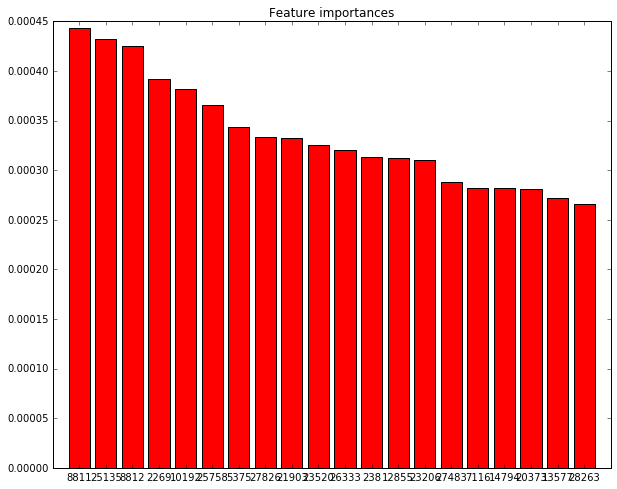

In [3]:
Show(N=20,importances=importance)

In [4]:
def First(importances,number):
    indices = importances>number
    for i in range(len(importances)):
        if  not indices[i]:
            importances[i]=0
    return importances

In [5]:
importance.sum()

1.0

In [10]:
store = pd.HDFStore('store.h5')
store['feature_score_for_1']=First(importance,0.0001)
store.flush(fsync=True)

store.close()
store = pd.HDFStore('store.h5')
gene = store['gene_info'].applymap(lambda x:int(x))
feat_score = store['feature_score_for_1'].as_matrix()
weidian_s = zeros(gene.shape[1])
for i in range(gene.shape[1]):
    weidian_s[i]=feat_score[3*i]+feat_score[3*i+1]+feat_score[3*i+2]
indices = np.argsort(np.dot(gene,weidian_s))[::-1]
print indices.T[:10]
store.close()

[299  93  95  96  97  98  99 100 101 102]


In [11]:
store = pd.HDFStore('store.h5')
store['feature_score_for_2']=First(importance,0.0002)
store.flush(fsync=True)

store.close()
store = pd.HDFStore('store.h5')
gene = store['gene_info'].applymap(lambda x:int(x))
feat_score = store['feature_score_for_2'].as_matrix()
weidian_s = zeros(gene.shape[1])
for i in range(gene.shape[1]):
    weidian_s[i]=feat_score[3*i]+feat_score[3*i+1]+feat_score[3*i+2]
indices = np.argsort(np.dot(gene,weidian_s))[::-1]
print indices.T[:10]
store.close()

[299  93  95  96  97  98  99 100 101 102]


In [12]:
store = pd.HDFStore('store.h5')
store['feature_score_for_3']=First(importance,0.0003)
store.flush(fsync=True)
store.close()
store = pd.HDFStore('store.h5')
gene = store['gene_info'].applymap(lambda x:int(x))
feat_score = store['feature_score_for_3'].as_matrix()
weidian_s = zeros(gene.shape[1])
for i in range(gene.shape[1]):
    weidian_s[i]=feat_score[3*i]+feat_score[3*i+1]+feat_score[3*i+2]
indices = np.argsort(np.dot(gene,weidian_s))[::-1]
print indices.T[:10]
store.close()

[299  93  95  96  97  98  99 100 101 102]


In [13]:
store = pd.HDFStore('store.h5')
store['feature_score_for_4']=First(importance,0.004)
store.flush(fsync=True)

store.close()
store = pd.HDFStore('store.h5')
gene = store['gene_info'].applymap(lambda x:int(x))
feat_score = store['feature_score_for_4'].as_matrix()
weidian_s = zeros(gene.shape[1])
for i in range(gene.shape[1]):
    weidian_s[i]=feat_score[3*i]+feat_score[3*i+1]+feat_score[3*i+2]
indices = np.argsort(np.dot(gene,weidian_s))[::-1]
print indices.T[:10]
store.close()

[299  93  95  96  97  98  99 100 101 102]


In [14]:
def DO(n):
    store = pd.HDFStore('store.h5')
    gene = store['gene_info'].applymap(lambda x:int(x))
    importance=store['feature_score_rf']
    feat_score = First(importance,n).as_matrix()
    weidian_s = zeros(gene.shape[1])
    for i in range(gene.shape[1]):
        weidian_s[i]=feat_score[3*i]+feat_score[3*i+1]+feat_score[3*i+2]
    indices = np.argsort(np.dot(gene,weidian_s))[::-1]
    store = pd.HDFStore('store.h5')
    print indices.T[:10]
    return indices.T[:10]

In [15]:
result=[]
for i in range(0,45,1):
    print i*1.0/100000

    result.append(DO(i*1.0/100000))

0.0
[292  54 274 202 166 180 237 293  77 264]
1e-05
[292  54 274 202 166 180 237 293  77 264]
2e-05
[292  54 202 274 166 180 237  77 293 205]
3e-05
[292  54 202 274 166  77 180 237 205 161]
4e-05
[292  54 274 166 202 161  77 180 237 205]
5e-05
[292  54 274 143  77 166 205 202 161 237]
6e-05
[292  54 237 274 166 205 143  77 149 161]
7e-05
[292  54 237 274  77 205 143 180 161 166]
8e-05
[292  54 237 105 143 182 180  77 161 205]
9e-05
[292 237  54 105 182 231 174  77 114 253]
0.0001
[ 54 292 237 105 253 143 128 166  77 216]
0.00011
[ 54 237 292 114 143  77 149 182 264 162]
0.00012
[ 54 292 114  77 101 182 143 264 293 105]
0.00013
[ 54 292 264  77 114 182 149 101 143 171]
0.00014
[ 54 149 101 143 264 171 293  77 292 114]
0.00015
[ 54 101 143 264 171 293 292 114 167 244]
0.00016
[ 54 101 114 167 244 143 293 264  73  27]
0.00017
[ 54 101 167 143 264 114  27   2 273 244]
0.00018
[ 54 101 167 143 264 114  27   2 273 244]
0.00019
[ 54 101 167 264 114  27   2 244 182 216]
0.0002
[ 54 101 167 264

In [16]:
table=pd.DataFrame(result)

In [17]:
table

,0,1,2,3,4,5,6,7,8,9
0,292,54,274,202,166,180,237,293,77,264
1,292,54,274,202,166,180,237,293,77,264
2,292,54,202,274,166,180,237,77,293,205
3,292,54,202,274,166,77,180,237,205,161
4,292,54,274,166,202,161,77,180,237,205
5,292,54,274,143,77,166,205,202,161,237
6,292,54,237,274,166,205,143,77,149,161
7,292,54,237,274,77,205,143,180,161,166
8,292,54,237,105,143,182,180,77,161,205
9,292,237,54,105,182,231,174,77,114,253


In [18]:
data=table.values
    

In [19]:
data.shape
d=dict()
d.keys()

[]

In [20]:
for line in data:
    for item in line:
        if item not in d.keys():
            d[item]=1
        else:
            d[item]=d[item]+1
            

In [21]:
d

{2: 10,
 27: 24,
 44: 1,
 54: 24,
 61: 13,
 73: 1,
 77: 15,
 93: 1,
 95: 5,
 96: 11,
 97: 11,
 98: 11,
 99: 11,
 100: 9,
 101: 33,
 102: 6,
 105: 4,
 114: 29,
 128: 1,
 143: 13,
 149: 4,
 161: 6,
 162: 1,
 166: 9,
 167: 10,
 171: 3,
 174: 1,
 180: 7,
 182: 10,
 202: 6,
 205: 7,
 216: 2,
 231: 11,
 237: 12,
 244: 7,
 248: 8,
 253: 3,
 264: 35,
 273: 17,
 274: 8,
 279: 6,
 292: 16,
 293: 17,
 299: 11}

In [22]:
l=sorted(d.iteritems(),key=lambda x : x[1],reverse=True)

In [23]:
print l[:4]

[(264, 35), (101, 33), (114, 29), (27, 24)]
